# **Credit Card Fraud Detection**

The project aimed to compare and analyze three different machine learning algorithms (SVM, KNN, ANN) and find the most appropriate algorithm to detect credit card fraud. The Specific objectives are to:

* Collect and analyze the data
* Develop the models for the detection of fraud in credit cards
* Evaluate the models
* Compare the results of the models.
* Implement the best model

Class: Is the transaction fraudulent (Yes (1)/No (0))

# **Dataset Description**

The dataset contains 31 columns, out of which 28 are named v1-v28 to keep delicate data. 
The other columns represent Amount, Class, and Time.

In [1]:
import numpy as np
import pandas as pd 
import os
import datetime as dt
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from math import radians, sin, cos, sqrt, atan2
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pickle

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
#Read the data
dataset = pd.read_csv("../input/creditcardfraud/creditcard.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
# Check for unique values.
dataset.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

**Check for empty or missing data**

In [7]:
#Check for empty instances in the dataset
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#Check for instances in the dataset that are not available
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# Check for duplicates on each row.
dataset.duplicated().value_counts()

False    283726
True       1081
dtype: int64

0    284315
1       492
Name: Class, dtype: int64


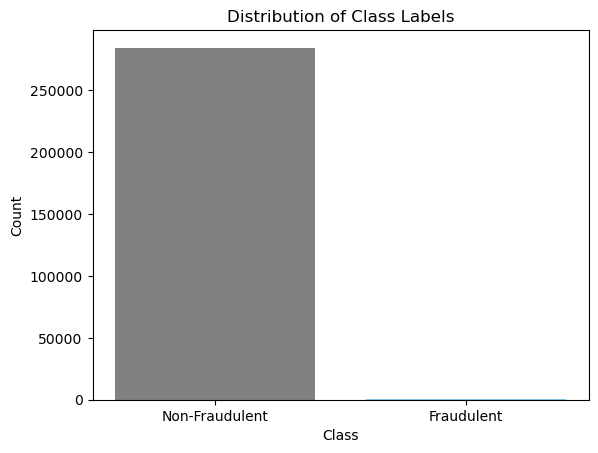

In [10]:
# Define the desired label arrangement
# desired_labels = ['Fraud', 'Not Fraud']

# Count the frequency of each label
label_counts = dataset['Class'].value_counts()
print(label_counts)

# Plot the bar chart
plt.bar(['Non-Fraudulent', 'Fraudulent'], label_counts, color=['gray', 'skyblue'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Class Labels')
plt.show()


In [11]:
#Drop duplicate rows
dataset = dataset.drop_duplicates()

0    283253
1       473
Name: Class, dtype: int64


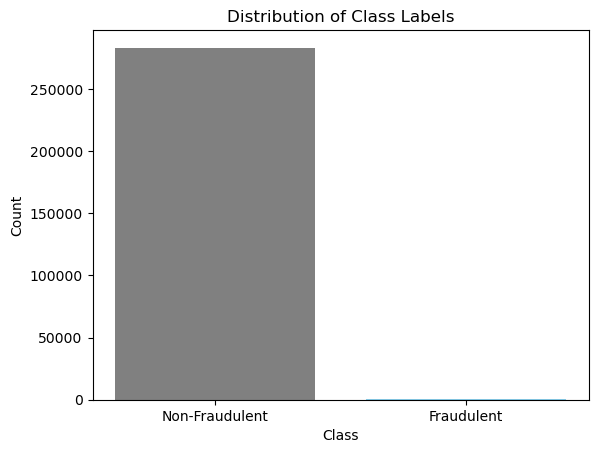

In [12]:
# Define the desired label arrangement
# desired_labels = ['Fraud', 'Not Fraud']

# Count the frequency of each label
label_counts = dataset['Class'].value_counts()
print(label_counts)

# Plot the bar chart
plt.bar(['Non-Fraudulent', 'Fraudulent'], label_counts, color=['gray', 'skyblue'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Class Labels')
plt.show()

# **Data Preprocessing**

In [13]:
#Define fraud and valid
fraudulent = dataset[dataset['Class'] == 1]
non_fraudulent = dataset[dataset['Class'] == 0]
#Print counts
print('There are {} fraudulent transactions'.format(fraudulent.shape[0]))
print('There are {} non fraudulent transcations'.format(non_fraudulent.shape[0]))

There are 473 fraudulent transactions
There are 283253 non fraudulent transcations


In [14]:
fraudulent.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
non_fraudulent.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

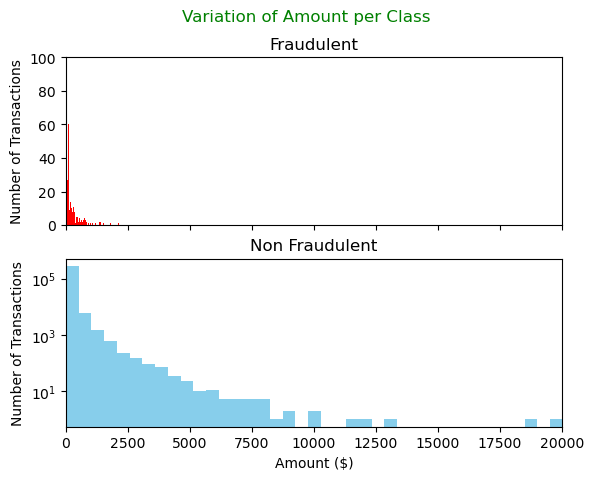

In [16]:

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True)
fig.suptitle("Variation of Amount per Class", color='green')
bins=50
ax0.hist(fraudulent['Amount'], bins=bins, color='red')
ax0.set_title('Fraudulent')
ax0.set_ylim(0, 100)
ax0.set_ylabel('Number of Transactions')
plt.xlim(0, 20000)

ax1.hist(non_fraudulent['Amount'], bins=bins, color='skyblue')
ax1.set_title('Non Fraudulent')
ax1.set_ylabel('Number of Transactions')

plt.xlim(0, 20000)
plt.xlabel('Amount ($)')
plt.yscale('log')

In [17]:
# #Scaling the amount
# scaler=StandardScaler()
# #Scale data
# dataset['Amount']=scaler.fit_transform(dataset[['Amount']])

In [18]:
dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
#Define X and y
features = dataset.drop('Class', axis=1)
labels= dataset['Class']

In [20]:
features

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [21]:
labels

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64

In [22]:
#Get the training and test set from the  dataset
X_Train, X_Test, Y_Train, Y_Test = train_test_split(features, labels, test_size=0.3, random_state= 43)

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=10)
selector.fit(X_Train, Y_Train)

SelectKBest()

In [24]:
cols=selector.get_support(indices=True)
cols

array([ 3,  4,  7, 10, 11, 12, 14, 16, 17, 18])

In [25]:
len(cols)

10

In [26]:
X_Train = X_Train.iloc[:,cols]
X_Test = X_Test.iloc[:,cols]

In [27]:
X_Train

,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18
85352,0.046233,0.023162,-0.597420,-0.363552,-1.279383,-0.834887,0.801090,0.232129,0.110660,-0.351603
57139,0.343576,-1.765859,1.249425,-1.968673,-0.213580,0.335589,0.625759,-0.653885,0.306129,-0.275467
19611,0.220586,0.963914,0.161704,-0.082495,-1.435226,-0.427288,0.558209,0.135674,-0.360617,0.437737
162984,-0.327956,3.930888,-0.226970,1.284790,-1.759268,-0.036581,-0.352047,0.413853,-0.431563,-0.428850
229925,0.293411,0.593817,-0.414467,0.147702,-2.090136,-0.692153,-0.019780,0.808108,-0.796892,0.808467
...,...,...,...,...,...,...,...,...,...,...
57890,2.792438,-0.625725,-0.790891,-1.039157,0.210669,0.545570,-0.585721,-0.032428,0.021663,-0.132228
40934,0.808652,1.087793,0.559701,0.735040,-1.194650,0.153212,-0.395409,-1.052219,0.223184,-0.517732
248980,1.418824,-2.279927,-0.724240,1.016746,0.145263,-1.100710,-0.234693,-0.528620,0.430701,0.965706
151439,0.831162,4.321840,0.744170,1.555181,-0.968184,-4.192806,1.768503,-0.162742,0.647572,0.361636


In [28]:
X_Test

,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18
237255,0.652822,1.807533,-1.519066,-0.188697,-2.196390,-0.135638,-0.909495,-0.147858,0.071022,0.373232
15616,0.243573,0.492531,-0.271901,-0.159700,1.836360,0.324495,0.255649,0.152388,0.389850,-0.531437
132882,1.228407,1.438787,-1.058979,-0.325440,-0.477471,1.521198,-1.043341,-0.294719,-0.115435,0.145303
124894,-1.691583,-1.275239,-2.611761,-1.134702,0.200423,2.297016,2.277484,1.654603,0.403827,0.327883
5719,0.991913,0.080728,0.425822,0.152789,2.120203,-2.345346,1.045379,0.629278,0.329087,0.770574
...,...,...,...,...,...,...,...,...,...,...
162953,-1.065577,0.408664,0.172346,0.063840,-0.685017,0.476135,0.274519,-0.165334,-0.233574,-0.962614
180866,1.848204,-0.190021,0.900628,-1.233811,-0.468852,0.042254,-0.041194,-0.273188,-0.136032,-0.930368
282340,-6.268944,-0.946963,-3.069688,3.358536,-2.212849,1.395457,2.678751,0.492959,1.297553,0.277764
235683,-1.228824,0.206710,0.003260,0.258161,0.513708,0.586840,0.614052,0.186735,-0.581428,-0.234226


In [29]:
unique, counts = np.unique(Y_Train, return_counts=True)
dict(zip(unique, counts))

{0: 198284, 1: 324}

In [30]:
unique, counts = np.unique(Y_Test, return_counts=True)
dict(zip(unique, counts))

{0: 84969, 1: 149}

In [31]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy="auto", random_state=42)

X_Train_smote, Y_Train_smote = smote.fit_resample(X_Train, Y_Train)

In [32]:
unique, counts = np.unique(Y_Train_smote, return_counts=True)
dict(zip(unique, counts))

{0: 198284, 1: 198284}

# **Modelling: Using Normal Dataset**

# **SVM**

In [162]:
#Initiate the SVM model
# svm_model = SVC(random_state=24)
svm_model = SVC(C = 10, kernel = 'rbf', random_state=46)
svm_model.fit(X_Train, Y_Train)

SVC(C=10, random_state=46)

In [163]:
#Predicting the y_test using the Random forest model
y_pred = svm_model.predict(X_Test)

In [164]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

[[84962     7]
 [   37   112]]


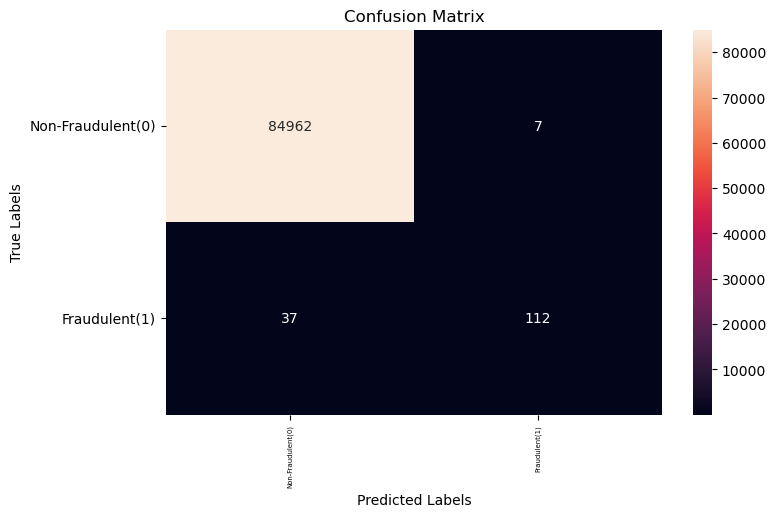

In [165]:
#Import confusion_matrix for evaluation
cm = confusion_matrix(Y_Test, y_pred)
print(cm)

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(["Non-Fraudulent(0)", "Fraudulent(1)"], fontsize = 5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(["Non-Fraudulent(0)", "Fraudulent(1)"], fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=12)

plt.savefig('SVM Confusion Matrix.png')
plt.show()

In [166]:
#Classification report
print(classification_report(Y_Test, y_pred, target_names = ["Non-Fraudulent(0)", "Fraudulent(1)"]))

                   precision    recall  f1-score   support

Non-Fraudulent(0)       1.00      1.00      1.00     84969
    Fraudulent(1)       0.94      0.75      0.84       149

         accuracy                           1.00     85118
        macro avg       0.97      0.88      0.92     85118
     weighted avg       1.00      1.00      1.00     85118



In [167]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(Y_Test, y_pred)
precision = precision_score(Y_Test, y_pred)
recall = recall_score(Y_Test, y_pred)
f1 = f1_score(Y_Test, y_pred)


# Print the evaluation metrics
print("Accuracy: %.f" %(accuracy*100))
print("Precision: %.f" %(precision*100))
print("Recall: %.f" %(recall*100))
print("F1-score: %.f" %(f1*100))

Accuracy: 100
Precision: 94
Recall: 75
F1-score: 84


In [168]:
pickle.dump(svm_model, open("normal_svm_model", 'wb'))

# **KNN**

In [169]:
#Initiate the SVM model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_Train, Y_Train)

KNeighborsClassifier()

In [170]:
#Predicting the y_test using the Random forest model
y_pred = knn_model.predict(X_Test)

[[84960     9]
 [   31   118]]


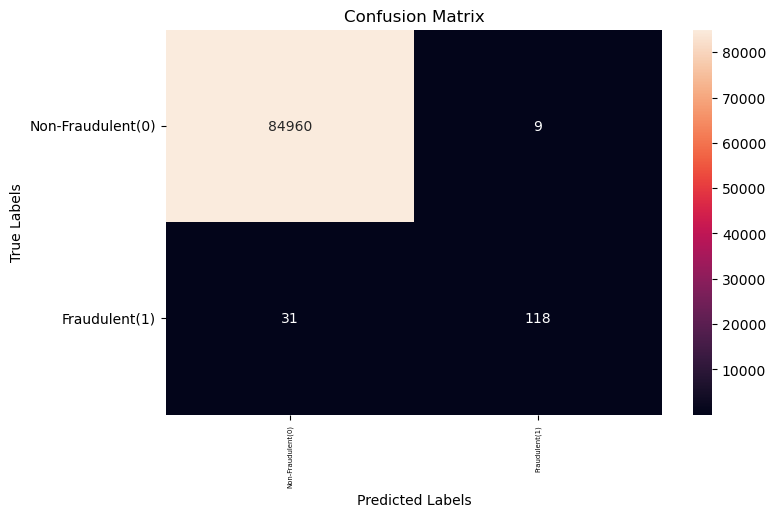

In [171]:
#Import confusion_matrix for evaluation
cm = confusion_matrix(Y_Test, y_pred)
print(cm)

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(["Non-Fraudulent(0)", "Fraudulent(1)"], fontsize = 5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(["Non-Fraudulent(0)", "Fraudulent(1)"], fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=12)

plt.savefig(' Confusion Matrix.png')
plt.show()

In [172]:
#Classification report
print(classification_report(Y_Test, y_pred, target_names = ["Non-Fraudulent(0)", "Fraudulent(1)"]))

                   precision    recall  f1-score   support

Non-Fraudulent(0)       1.00      1.00      1.00     84969
    Fraudulent(1)       0.93      0.79      0.86       149

         accuracy                           1.00     85118
        macro avg       0.96      0.90      0.93     85118
     weighted avg       1.00      1.00      1.00     85118



In [173]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(Y_Test, y_pred)
precision = precision_score(Y_Test, y_pred)
recall = recall_score(Y_Test, y_pred)
f1 = f1_score(Y_Test, y_pred)


# Print the evaluation metrics
print("Accuracy: %.f" %(accuracy*100))
print("Precision: %.f" %(precision*100))
print("Recall: %.f" %(recall*100))
print("F1-score: %.f" %(f1*100))

Accuracy: 100
Precision: 93
Recall: 79
F1-score: 86


In [174]:
pickle.dump(knn_model, open("normal_knn_model", 'wb'))

# **ANN**

In [175]:
from keras.models import Sequential
from keras.layers import Dense

In [176]:
import tensorflow as tf
# Define the early stopping and learning rate reduction callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5, restore_best_weights=True)
# learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience = 5)

In [177]:
ann_model = Sequential()
ann_model.add(Dense(12, input_dim=10, activation='relu'))
ann_model.add(Dense(8, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))
ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [178]:
ann_model_history = ann_model.fit(X_Train, Y_Train, epochs=100, validation_split=0.2, 
                                  shuffle=True, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
4966/4966 [==============================] - 15s 3ms/step - loss: 0.0398 - accuracy: 0.9831 - val_loss: 0.0049 - val_accuracy: 0.9983
Epoch 2/100
4966/4966 [==============================] - 14s 3ms/step - loss: 0.0042 - accuracy: 0.9990 - val_loss: 0.0031 - val_accuracy: 0.9995
Epoch 3/100
4966/4966 [==============================] - 14s 3ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 4/100
4966/4966 [==============================] - 14s 3ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0027 - val_accuracy: 0.9995
Epoch 5/100
4966/4966 [==============================] - 14s 3ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0027 - val_accuracy: 0.9995
Epoch 6/100
4966/4966 [==============================] - 13s 3ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 7/100
4966/4966 [==============================] - 14s 3ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0026 -

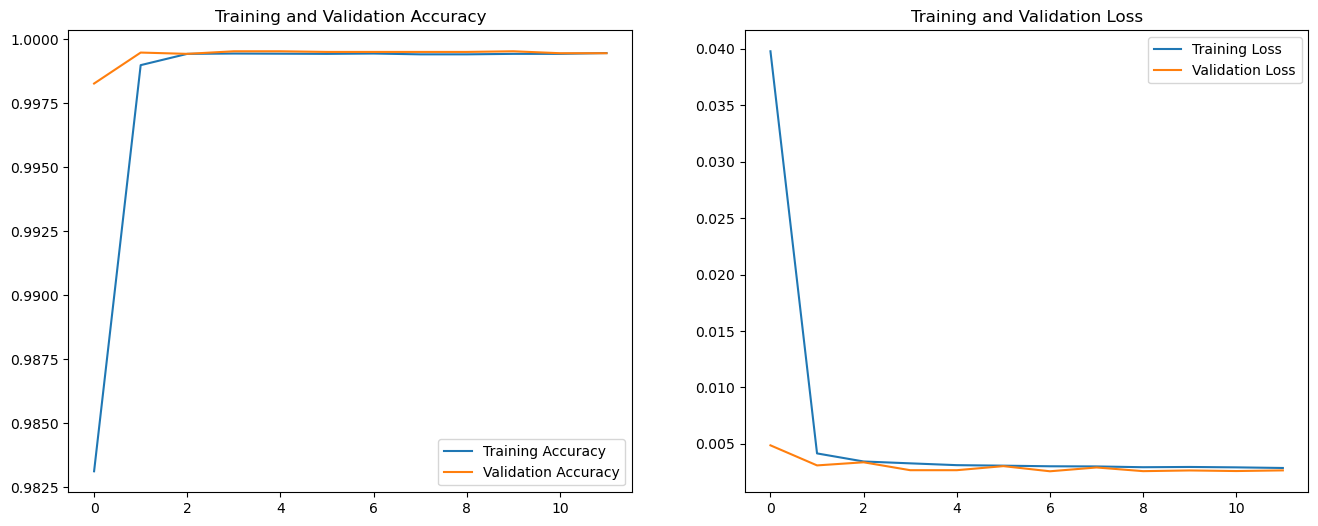

In [179]:
#Plotting the VGG16 model results

#Getting the accuracy
acc = ann_model_history.history['accuracy']
val_acc = ann_model_history.history['val_accuracy']

#Getting the losses
loss = ann_model_history.history['loss']
val_loss = ann_model_history.history['val_loss']

#No of epochs it trained
epochs_range = ann_model_history.epoch

#Plotting Training and Validation accuracy
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [180]:
evaluation_result=ann_model.evaluate(X_Test,Y_Test)

2660/2660 [==============================] - 5s 2ms/step - loss: 0.0034 - accuracy: 0.9993


In [181]:
print("Loss of the model is - " , evaluation_result[0])
print("Accuracy of the model is - " , evaluation_result[1]*100 , "%")

Loss of the model is -  0.003393332939594984
Accuracy of the model is -  99.93185997009277 %


In [182]:
ann_predictions = ann_model.predict(X_Test)

2660/2660 [==============================] - 4s 1ms/step


In [183]:
y_pred = (ann_predictions> 0.5).astype("int32").flatten()

[[84948    21]
 [   37   112]]


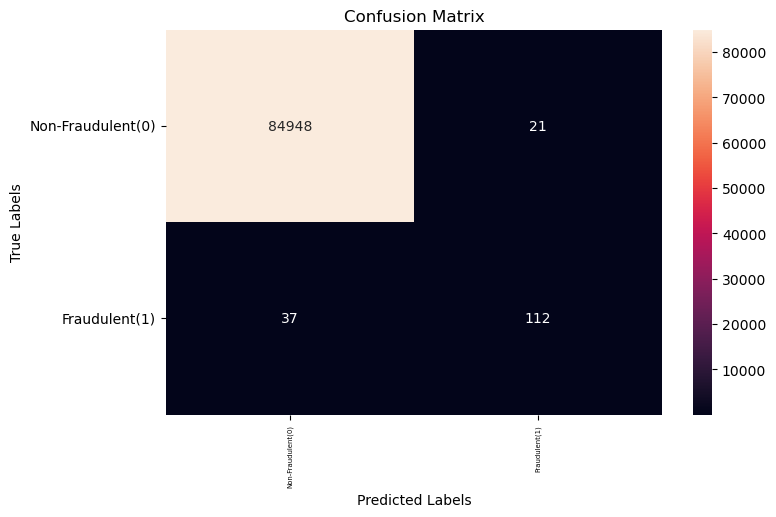

In [184]:
#Import confusion_matrix for evaluation
cm = confusion_matrix(Y_Test, y_pred)
print(cm)

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(["Non-Fraudulent(0)", "Fraudulent(1)"], fontsize = 5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(["Non-Fraudulent(0)", "Fraudulent(1)"], fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=12)

plt.savefig('ANN Confusion Matrix.png')
plt.show()

In [185]:
#Classification report
print(classification_report(Y_Test, y_pred, target_names = ["Non-Fraudulent(0)", "Fraudulent(1)"]))

                   precision    recall  f1-score   support

Non-Fraudulent(0)       1.00      1.00      1.00     84969
    Fraudulent(1)       0.84      0.75      0.79       149

         accuracy                           1.00     85118
        macro avg       0.92      0.88      0.90     85118
     weighted avg       1.00      1.00      1.00     85118



In [186]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(Y_Test, y_pred)
precision = precision_score(Y_Test, y_pred)
recall = recall_score(Y_Test, y_pred)
f1 = f1_score(Y_Test, y_pred)


# Print the evaluation metrics
print("Accuracy: %.f" %(accuracy*100))
print("Precision: %.f" %(precision*100))
print("Recall: %.f" %(recall*100))
print("F1-score: %.f" %(f1*100))

Accuracy: 100
Precision: 84
Recall: 75
F1-score: 79


In [187]:
pickle.dump(ann_model, open("normal_ann_model", 'wb'))

# **Modelling: OverSampling minority class using SMOTE**

In [188]:
#Initiate the SVM model
# svm_model = SVC(random_state=24)
svm_model = SVC(C = 10, kernel = 'rbf', random_state=46)
svm_model.fit(X_Train, Y_Train)

SVC(C=10, random_state=46)

In [189]:
#Predicting the y_test using the Random forest model
y_pred = svm_model.predict(X_Test)

In [190]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

[[84962     7]
 [   37   112]]


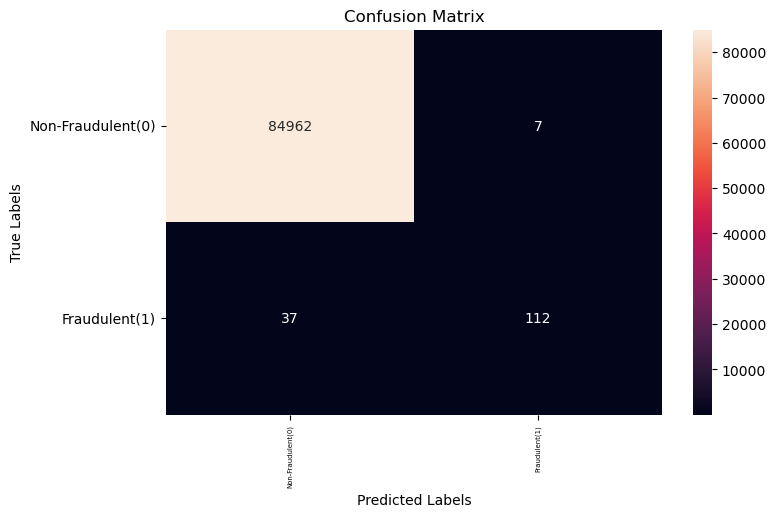

In [191]:
#Import confusion_matrix for evaluation
cm = confusion_matrix(Y_Test, y_pred)
print(cm)

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(["Non-Fraudulent(0)", "Fraudulent(1)"], fontsize = 5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(["Non-Fraudulent(0)", "Fraudulent(1)"], fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=12)

plt.savefig('SVM Confusion Matrix.png')
plt.show()

In [192]:
#Classification report
print(classification_report(Y_Test, y_pred, target_names = ["Non-Fraudulent(0)", "Fraudulent(1)"]))

                   precision    recall  f1-score   support

Non-Fraudulent(0)       1.00      1.00      1.00     84969
    Fraudulent(1)       0.94      0.75      0.84       149

         accuracy                           1.00     85118
        macro avg       0.97      0.88      0.92     85118
     weighted avg       1.00      1.00      1.00     85118



In [193]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(Y_Test, y_pred)
precision = precision_score(Y_Test, y_pred)
recall = recall_score(Y_Test, y_pred)
f1 = f1_score(Y_Test, y_pred)


# Print the evaluation metrics
print("Accuracy: %.f" %(accuracy*100))
print("Precision: %.f" %(precision*100))
print("Recall: %.f" %(recall*100))
print("F1-score: %.f" %(f1*100))

Accuracy: 100
Precision: 94
Recall: 75
F1-score: 84


In [194]:
pickle.dump(svm_model, open("oversample_svm_model", 'wb'))

# **KNN**

In [195]:
#Initiate the SVM model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_Train_smote, Y_Train_smote)

KNeighborsClassifier()

In [196]:
#Predicting the y_test using the Random forest model
y_pred = knn_model.predict(X_Test)

[[84724   245]
 [   17   132]]


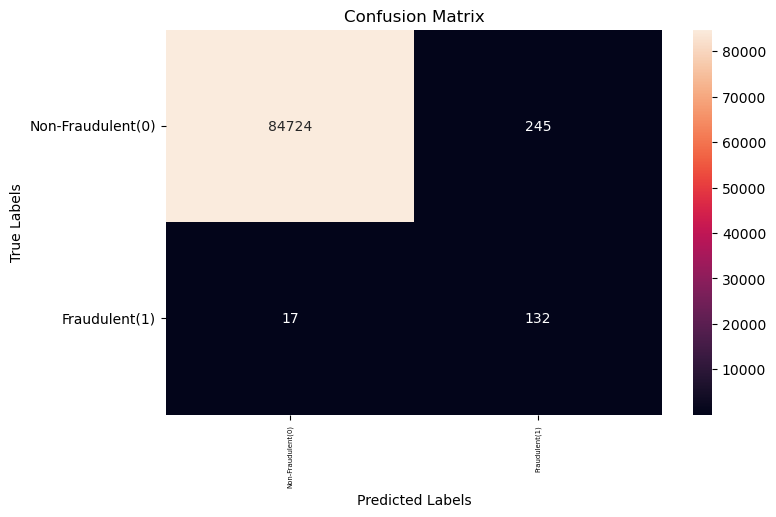

In [197]:
#Import confusion_matrix for evaluation
cm = confusion_matrix(Y_Test, y_pred)
print(cm)

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(["Non-Fraudulent(0)", "Fraudulent(1)"], fontsize = 5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(["Non-Fraudulent(0)", "Fraudulent(1)"], fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=12)

plt.savefig(' Confusion Matrix.png')
plt.show()

In [198]:
#Classification report
print(classification_report(Y_Test, y_pred, target_names = ["Non-Fraudulent(0)", "Fraudulent(1)"]))

                   precision    recall  f1-score   support

Non-Fraudulent(0)       1.00      1.00      1.00     84969
    Fraudulent(1)       0.35      0.89      0.50       149

         accuracy                           1.00     85118
        macro avg       0.67      0.94      0.75     85118
     weighted avg       1.00      1.00      1.00     85118



In [199]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(Y_Test, y_pred)
precision = precision_score(Y_Test, y_pred)
recall = recall_score(Y_Test, y_pred)
f1 = f1_score(Y_Test, y_pred)


# Print the evaluation metrics
print("Accuracy: %.f" %(accuracy*100))
print("Precision: %.f" %(precision*100))
print("Recall: %.f" %(recall*100))
print("F1-score: %.f" %(f1*100))

Accuracy: 100
Precision: 35
Recall: 89
F1-score: 50


In [200]:
pickle.dump(knn_model, open("oversample_knn_model", 'wb'))

# **ANN**

In [201]:
from keras.models import Sequential
from keras.layers import Dense

In [202]:
import tensorflow as tf
# Define the early stopping and learning rate reduction callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5, restore_best_weights=True)
# learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience = 5)

In [203]:
ann_model = Sequential()
ann_model.add(Dense(12, input_dim=10, activation='relu'))
ann_model.add(Dense(8, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))
ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [204]:
ann_model_history = ann_model.fit(X_Train_smote, Y_Train_smote, epochs=100, validation_split=0.2, 
                                  shuffle=True, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
9915/9915 [==============================] - 30s 3ms/step - loss: 0.0991 - accuracy: 0.9609 - val_loss: 0.0923 - val_accuracy: 0.9645
Epoch 2/100
9915/9915 [==============================] - 30s 3ms/step - loss: 0.0542 - accuracy: 0.9790 - val_loss: 0.0584 - val_accuracy: 0.9788
Epoch 3/100
9915/9915 [==============================] - 28s 3ms/step - loss: 0.0433 - accuracy: 0.9840 - val_loss: 0.0391 - val_accuracy: 0.9886
Epoch 4/100
9915/9915 [==============================] - 29s 3ms/step - loss: 0.0370 - accuracy: 0.9868 - val_loss: 0.0378 - val_accuracy: 0.9899
Epoch 5/100
9915/9915 [==============================] - 27s 3ms/step - loss: 0.0332 - accuracy: 0.9886 - val_loss: 0.0287 - val_accuracy: 0.9930
Epoch 6/100
9915/9915 [==============================] - 28s 3ms/step - loss: 0.0310 - accuracy: 0.9893 - val_loss: 0.0369 - val_accuracy: 0.9912
Epoch 7/100
9915/9915 [==============================] - 28s 3ms/step - loss: 0.0297 - accuracy: 0.9897 - val_loss: 0.0216 -

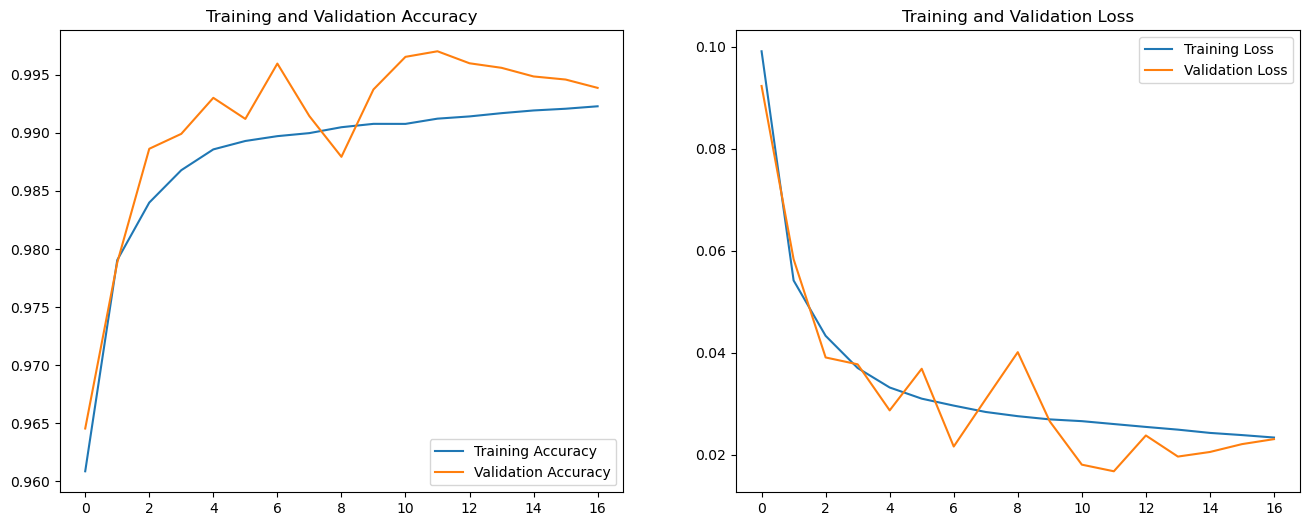

In [205]:
#Plotting the VGG16 model results

#Getting the accuracy
acc = ann_model_history.history['accuracy']
val_acc = ann_model_history.history['val_accuracy']

#Getting the losses
loss = ann_model_history.history['loss']
val_loss = ann_model_history.history['val_loss']

#No of epochs it trained
epochs_range = ann_model_history.epoch

#Plotting Training and Validation accuracy
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [206]:
evaluation_result=ann_model.evaluate(X_Test,Y_Test)

2660/2660 [==============================] - 5s 2ms/step - loss: 0.0362 - accuracy: 0.9875


In [207]:
print("Loss of the model is - " , evaluation_result[0])
print("Accuracy of the model is - " , evaluation_result[1]*100 , "%")

Loss of the model is -  0.0362410731613636
Accuracy of the model is -  98.74644875526428 %


In [208]:
ann_predictions = ann_model.predict(X_Test)

2660/2660 [==============================] - 4s 1ms/step


In [209]:
y_pred = (ann_predictions> 0.5).astype("int32").flatten()

[[83923  1046]
 [   21   128]]


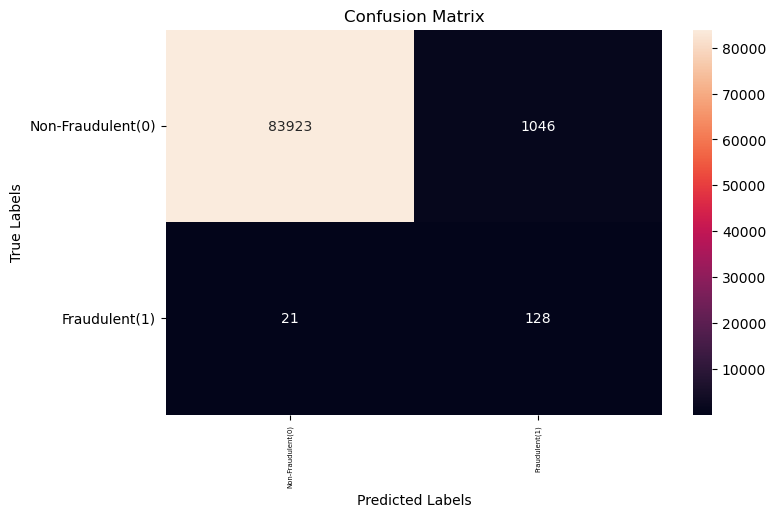

In [210]:
#Import confusion_matrix for evaluation
cm = confusion_matrix(Y_Test, y_pred)
print(cm)

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(["Non-Fraudulent(0)", "Fraudulent(1)"], fontsize = 5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(["Non-Fraudulent(0)", "Fraudulent(1)"], fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=12)

plt.savefig('ANN Confusion Matrix.png')
plt.show()

In [211]:
#Classification report
print(classification_report(Y_Test, y_pred, target_names = ["Non-Fraudulent(0)", "Fraudulent(1)"]))

                   precision    recall  f1-score   support

Non-Fraudulent(0)       1.00      0.99      0.99     84969
    Fraudulent(1)       0.11      0.86      0.19       149

         accuracy                           0.99     85118
        macro avg       0.55      0.92      0.59     85118
     weighted avg       1.00      0.99      0.99     85118



In [212]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(Y_Test, y_pred)
precision = precision_score(Y_Test, y_pred)
recall = recall_score(Y_Test, y_pred)
f1 = f1_score(Y_Test, y_pred)


# Print the evaluation metrics
print("Accuracy: %.f" %(accuracy*100))
print("Precision: %.f" %(precision*100))
print("Recall: %.f" %(recall*100))
print("F1-score: %.f" %(f1*100))

Accuracy: 99
Precision: 11
Recall: 86
F1-score: 19


In [213]:
pickle.dump(ann_model, open("oversample_ann_model", 'wb'))

# **Modeling: Undersampling majority class**

In [62]:
non_fraudulent_samples = non_fraudulent.sample(n=473)

In [63]:
new_undersampled_dataset = pd.concat([non_fraudulent_samples, fraudulent], axis=0)

In [64]:
new_undersampled_dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
87204,61580.0,-1.211340,-1.954138,1.499550,-3.361493,-1.016939,-0.626903,-0.325513,0.270111,1.134328,...,-0.227939,-0.505572,0.444646,-0.097841,-0.066170,-1.027285,0.128791,0.162605,191.28,0
157384,109851.0,-0.284514,1.165373,0.177717,-0.378406,1.039553,-1.102291,1.034462,-0.278900,0.673549,...,0.218385,0.931018,-0.329316,-0.042216,-0.131934,-0.242452,0.143459,0.190681,10.00,0
278802,168444.0,-0.284225,1.062583,-0.438521,-0.428567,0.143960,-0.976930,0.516598,0.362381,-0.250914,...,0.459157,1.374485,-0.058607,0.020916,-0.867734,-0.232824,0.375926,0.247500,2.99,0
73224,55038.0,1.272987,0.035653,0.619224,-0.067198,-0.701973,-1.002184,-0.126290,-0.229762,0.231882,...,-0.118246,-0.287591,0.078055,0.459722,0.152134,0.901030,-0.064706,0.012609,8.00,0
53676,46097.0,1.435712,-1.082831,0.182977,-1.283088,-1.497772,-1.113826,-0.728273,-0.302213,-1.914408,...,-0.121210,-0.073602,-0.074380,0.385013,0.492510,-0.119988,0.008326,0.023940,64.00,0


In [65]:
new_undersampled_dataset.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


0    473
1    473
Name: Class, dtype: int64


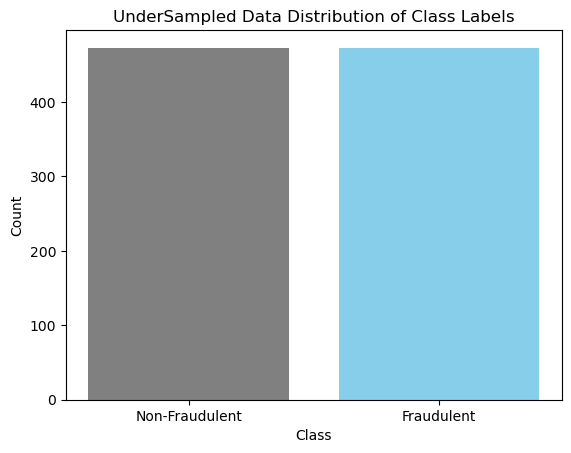

In [66]:
# Count the frequency of each label
label_counts = new_undersampled_dataset['Class'].value_counts()
print(label_counts)

# Plot the bar chart
plt.bar(['Non-Fraudulent', 'Fraudulent'], label_counts, color=['gray', 'skyblue'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('UnderSampled Data Distribution of Class Labels')
plt.show()

In [67]:
#Define X and y
undersampled_dataset_features = new_undersampled_dataset.drop('Class', axis=1)
undersampled_dataset_labels = new_undersampled_dataset['Class']

In [68]:
undersampled_dataset_features

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
87204,61580.0,-1.211340,-1.954138,1.499550,-3.361493,-1.016939,-0.626903,-0.325513,0.270111,1.134328,...,-0.034145,-0.227939,-0.505572,0.444646,-0.097841,-0.066170,-1.027285,0.128791,0.162605,191.28
157384,109851.0,-0.284514,1.165373,0.177717,-0.378406,1.039553,-1.102291,1.034462,-0.278900,0.673549,...,-0.099547,0.218385,0.931018,-0.329316,-0.042216,-0.131934,-0.242452,0.143459,0.190681,10.00
278802,168444.0,-0.284225,1.062583,-0.438521,-0.428567,0.143960,-0.976930,0.516598,0.362381,-0.250914,...,-0.216985,0.459157,1.374485,-0.058607,0.020916,-0.867734,-0.232824,0.375926,0.247500,2.99
73224,55038.0,1.272987,0.035653,0.619224,-0.067198,-0.701973,-1.002184,-0.126290,-0.229762,0.231882,...,0.015119,-0.118246,-0.287591,0.078055,0.459722,0.152134,0.901030,-0.064706,0.012609,8.00
53676,46097.0,1.435712,-1.082831,0.182977,-1.283088,-1.497772,-1.113826,-0.728273,-0.302213,-1.914408,...,-0.247998,-0.121210,-0.073602,-0.074380,0.385013,0.492510,-0.119988,0.008326,0.023940,64.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [69]:
undersampled_dataset_labels

87204     0
157384    0
278802    0
73224     0
53676     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 946, dtype: int64

In [70]:
undersampled_dataset_features = undersampled_dataset_features.iloc[:,cols]
# undersampled_dataset_labels = undersampled_dataset_labels.iloc[:,cols]

In [71]:
#Get the training and test set from the dataset
X_Train, X_Test, Y_Train, Y_Test = train_test_split(undersampled_dataset_features, undersampled_dataset_labels, 
                                                    test_size=0.3, random_state= 43)

In [72]:
X_Train

,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18
95623,0.175704,-1.470026,-1.073566,1.431291,-0.914303,-1.620776,-0.058858,-0.489579,0.677984,-0.174266
144326,1.557214,0.488635,-0.842039,-0.259089,-1.486590,-0.612689,0.037576,-0.078815,-0.068598,-0.273524
227287,-1.000552,-0.411523,2.185356,-0.217487,0.893830,0.012156,1.040723,-1.853450,0.508937,-0.748117
50537,1.972183,-1.255593,0.059110,-1.481246,-0.473852,0.922184,-0.499350,-0.560472,-0.207707,0.380542
143090,-0.207568,0.873367,-0.630834,-0.277122,2.086221,0.364493,-1.016349,-0.079258,1.486850,0.458383
...,...,...,...,...,...,...,...,...,...,...
13814,0.852924,3.041355,1.932300,0.397224,0.482560,-2.893888,1.947449,-0.161041,0.854184,-0.134327
177195,-2.273977,1.536844,-2.377140,-2.776747,1.428413,-4.482679,-4.610138,-4.602713,-7.524188,-2.557104
66509,0.831573,-1.236124,-0.928571,1.357031,0.072154,-0.086470,-0.593138,-0.334686,0.475585,-0.330368
212639,-1.642870,0.486138,0.488308,0.107597,-0.937954,0.046074,0.544190,-0.596556,0.021102,-0.857858


In [73]:
Y_Train

95623     0
144326    0
227287    0
50537     1
143090    0
         ..
13814     0
177195    1
66509     0
212639    0
195383    1
Name: Class, Length: 662, dtype: int64

In [74]:
X_Test

,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18
17489,1.676694,-0.048087,0.691947,-0.270605,0.179853,0.391531,0.077701,-0.248608,-0.031445,-0.961097
150665,-10.054635,9.064478,-10.317566,-11.092392,7.154083,-17.150405,-11.030110,-12.448562,-22.667905,-9.264609
4920,-0.359745,2.330243,0.562320,-1.525412,2.032912,-6.560124,-1.470102,-2.282194,-4.781831,-2.615665
67341,0.618869,0.789844,-0.081967,-0.039055,1.237963,1.292676,0.121529,-0.147983,-0.150624,-0.294267
261135,-0.532221,3.898447,0.238827,1.335681,-1.354832,0.686564,-0.334401,0.413291,-0.651051,-0.676402
...,...,...,...,...,...,...,...,...,...,...
238222,-3.908229,2.942946,-2.874155,-3.235439,3.341802,-7.562860,-11.571423,-6.180919,-9.285186,-3.921722
77348,-2.851395,2.324480,-3.065234,-4.881143,2.255147,-4.686387,-6.174288,-4.849692,-6.536521,-3.119094
236338,-2.341005,-1.199261,0.075791,1.113164,0.664200,-0.419011,0.644541,0.788869,-0.022078,-0.990192
152295,-20.134613,11.122771,-23.928661,-15.231833,4.417055,-12.893520,-3.547230,-10.402068,-18.372019,-8.314092


In [75]:
Y_Test

17489     0
150665    1
4920      1
67341     0
261135    0
         ..
238222    1
77348     1
236338    0
152295    1
149145    1
Name: Class, Length: 284, dtype: int64

In [76]:
unique, counts = np.unique(Y_Train, return_counts=True)
dict(zip(unique, counts))

{0: 340, 1: 322}

In [77]:
unique, counts = np.unique(Y_Test, return_counts=True)
dict(zip(unique, counts))

{0: 133, 1: 151}

# **SVM**

In [230]:
#Initiate the SVM model
# svm_model = SVC(random_state=24)
svm_model = SVC(C = 10, kernel = 'rbf', random_state=46)
svm_model.fit(X_Train, Y_Train)

SVC(C=10, random_state=46)

In [231]:
#Predicting the y_test using the Random forest model
y_pred = svm_model.predict(X_Test)

In [232]:
y_pred

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1])

[[131   2]
 [ 17 134]]


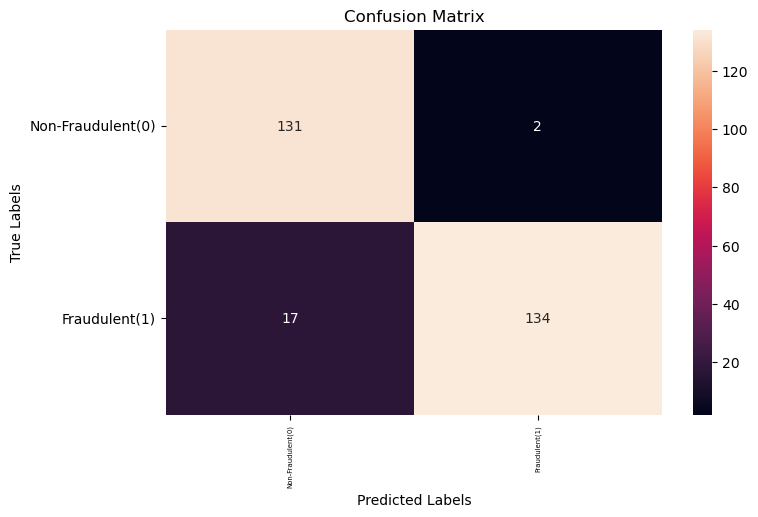

In [233]:
#Import confusion_matrix for evaluation
cm = confusion_matrix(Y_Test, y_pred)
print(cm)

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(["Non-Fraudulent(0)", "Fraudulent(1)"], fontsize = 5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(["Non-Fraudulent(0)", "Fraudulent(1)"], fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=12)

plt.savefig('SVM Confusion Matrix.png')
plt.show()

In [234]:
#Classification report
print(classification_report(Y_Test, y_pred, target_names = ["Non-Fraudulent(0)", "Fraudulent(1)"]))

                   precision    recall  f1-score   support

Non-Fraudulent(0)       0.89      0.98      0.93       133
    Fraudulent(1)       0.99      0.89      0.93       151

         accuracy                           0.93       284
        macro avg       0.94      0.94      0.93       284
     weighted avg       0.94      0.93      0.93       284



In [235]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(Y_Test, y_pred)
precision = precision_score(Y_Test, y_pred)
recall = recall_score(Y_Test, y_pred)
f1 = f1_score(Y_Test, y_pred)


# Print the evaluation metrics
print("Accuracy: %.f" %(accuracy*100))
print("Precision: %.f" %(precision*100))
print("Recall: %.f" %(recall*100))
print("F1-score: %.f" %(f1*100))

Accuracy: 93
Precision: 99
Recall: 89
F1-score: 93


In [236]:
pickle.dump(svm_model, open("undersample_svm_model", 'wb'))

# **KNN**

In [237]:
#Initiate the SVM model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_Train, Y_Train)

KNeighborsClassifier()

In [238]:
#Predicting the y_test using the Random forest model
y_pred = knn_model.predict(X_Test)

[[128   5]
 [ 18 133]]


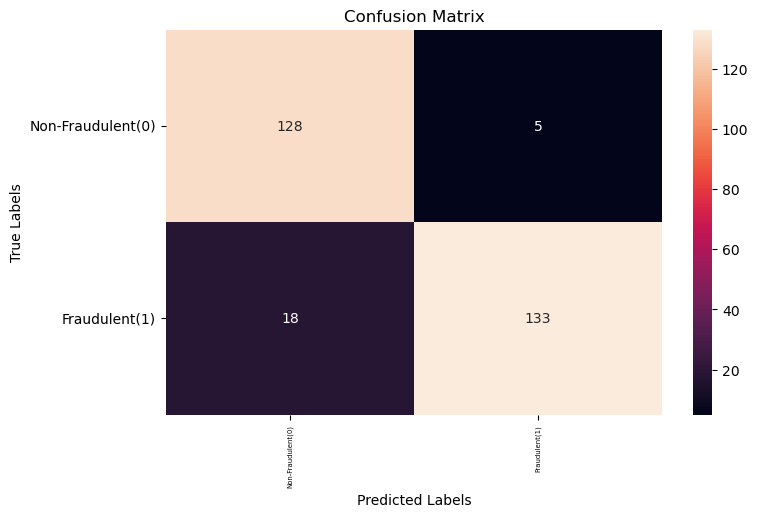

In [239]:
#Import confusion_matrix for evaluation
cm = confusion_matrix(Y_Test, y_pred)
print(cm)

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(["Non-Fraudulent(0)", "Fraudulent(1)"], fontsize = 5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(["Non-Fraudulent(0)", "Fraudulent(1)"], fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=12)

plt.savefig(' Confusion Matrix.png')
plt.show()

In [240]:
#Classification report
print(classification_report(Y_Test, y_pred, target_names = ["Non-Fraudulent(0)", "Fraudulent(1)"]))

                   precision    recall  f1-score   support

Non-Fraudulent(0)       0.88      0.96      0.92       133
    Fraudulent(1)       0.96      0.88      0.92       151

         accuracy                           0.92       284
        macro avg       0.92      0.92      0.92       284
     weighted avg       0.92      0.92      0.92       284



In [241]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(Y_Test, y_pred)
precision = precision_score(Y_Test, y_pred)
recall = recall_score(Y_Test, y_pred)
f1 = f1_score(Y_Test, y_pred)


# Print the evaluation metrics
print("Accuracy: %.f" %(accuracy*100))
print("Precision: %.f" %(precision*100))
print("Recall: %.f" %(recall*100))
print("F1-score: %.f" %(f1*100))

Accuracy: 92
Precision: 96
Recall: 88
F1-score: 92


In [242]:
pickle.dump(knn_model, open("undersample_knn_model", 'wb'))

# **ANN**

In [78]:
from keras.models import Sequential
from keras.layers import Dense

In [79]:
import tensorflow as tf
# Define the early stopping and learning rate reduction callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5, restore_best_weights=True)
# learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience = 5)

In [80]:
ann_model = Sequential()
ann_model.add(Dense(12, input_dim=10, activation='relu'))
ann_model.add(Dense(8, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))
ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [81]:
ann_model_history = ann_model.fit(X_Train, Y_Train, epochs=100, validation_split=0.2, 
                                  shuffle=True, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
17/17 [==============================] - 1s 32ms/step - loss: 1.5145 - accuracy: 0.5425 - val_loss: 1.0931 - val_accuracy: 0.5188
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.9095 - accuracy: 0.6163 - val_loss: 0.6723 - val_accuracy: 0.6992
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5696 - accuracy: 0.7713 - val_loss: 0.4554 - val_accuracy: 0.8647
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.4178 - accuracy: 0.8790 - val_loss: 0.3723 - val_accuracy: 0.8947
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3613 - accuracy: 0.8885 - val_loss: 0.3321 - val_accuracy: 0.9098
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3311 - accuracy: 0.9074 - val_loss: 0.3038 - val_accuracy: 0.9098
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3095 - accuracy: 0.9112 - val_loss: 0.2808 - val_accuracy: 0.9173
Epoch 8/100


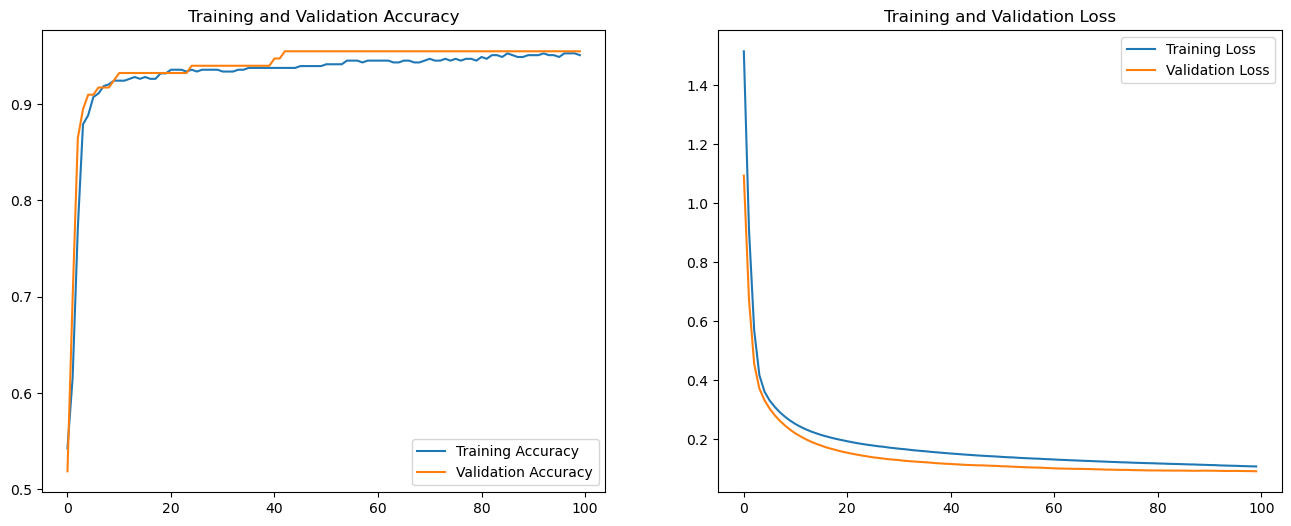

In [82]:
#Plotting the VGG16 model results

#Getting the accuracy
acc = ann_model_history.history['accuracy']
val_acc = ann_model_history.history['val_accuracy']

#Getting the losses
loss = ann_model_history.history['loss']
val_loss = ann_model_history.history['val_loss']

#No of epochs it trained
epochs_range = ann_model_history.epoch

#Plotting Training and Validation accuracy
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [83]:
evaluation_result=ann_model.evaluate(X_Test,Y_Test)

9/9 [==============================] - 0s 2ms/step - loss: 0.1825 - accuracy: 0.9401


In [84]:
print("Loss of the model is - " , evaluation_result[0])
print("Accuracy of the model is - " , evaluation_result[1]*100 , "%")

Loss of the model is -  0.18250446021556854
Accuracy of the model is -  94.01408433914185 %


In [85]:
ann_predictions = ann_model.predict(X_Test)

9/9 [==============================] - 0s 1ms/step


In [86]:
y_pred = (ann_predictions> 0.5).astype("int32").flatten()

[[131   2]
 [ 15 136]]


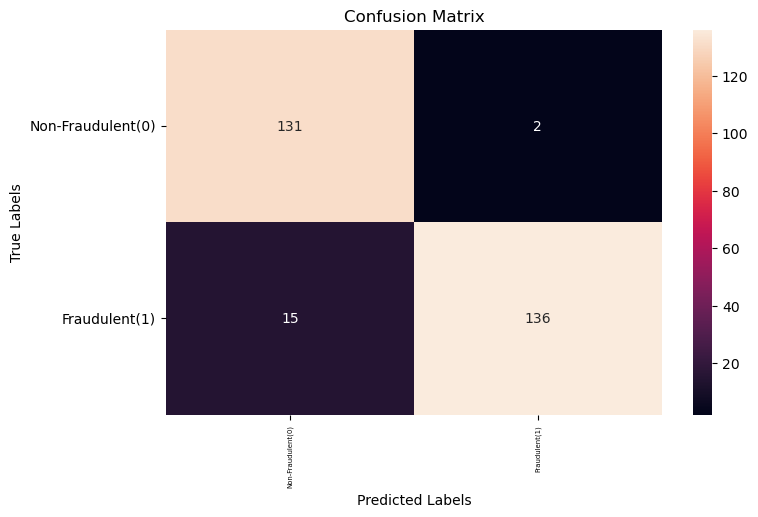

In [87]:
#Import confusion_matrix for evaluation
cm = confusion_matrix(Y_Test, y_pred)
print(cm)

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(["Non-Fraudulent(0)", "Fraudulent(1)"], fontsize = 5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(["Non-Fraudulent(0)", "Fraudulent(1)"], fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=12)

plt.savefig('ANN Confusion Matrix.png')
plt.show()

In [88]:
#Classification report
print(classification_report(Y_Test, y_pred, target_names = ["Non-Fraudulent(0)", "Fraudulent(1)"]))

                   precision    recall  f1-score   support

Non-Fraudulent(0)       0.90      0.98      0.94       133
    Fraudulent(1)       0.99      0.90      0.94       151

         accuracy                           0.94       284
        macro avg       0.94      0.94      0.94       284
     weighted avg       0.94      0.94      0.94       284



In [89]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(Y_Test, y_pred)
precision = precision_score(Y_Test, y_pred)
recall = recall_score(Y_Test, y_pred)
f1 = f1_score(Y_Test, y_pred)


# Print the evaluation metrics
print("Accuracy: %.f" %(accuracy*100))
print("Precision: %.f" %(precision*100))
print("Recall: %.f" %(recall*100))
print("F1-score: %.f" %(f1*100))

Accuracy: 94
Precision: 99
Recall: 90
F1-score: 94


In [90]:
#Save the model
ann_model.save("ann_undersample_model.h5")